In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 90)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
br = '\n'
f = 'data/AAA_household_profile_cost.csv'
AAA = pd.read_csv(f)
AAA.columns

Index(['Household_Key', 'Individual_Key', 'City', 'State_Grouped', 'ZIP5', 'ZIP9',
       'FSV_CMSI_Flag', 'FSV_Credit_Card_Flag', 'FSV_Deposit_Program_Flag',
       'FSV_Home_Equity_Flag', 'FSV_ID_Theft_Flag', 'FSV_Mortgage_Flag',
       'INS_Client_Flag', 'TRV_Globalware_Flag', 'Number_of_Children',
       'Responded_to_Catalog', 'Race', 'Length_Of_Residence', 'Mail_Responder',
       'Home_Owner', 'Income', 'Date_Of_Birth', 'Age', 'Children', 'Education',
       'Dwelling_Type', 'Credit_Ranges', 'Language', 'Gender', 'Branch_Name', 'County',
       'Join_AAA_Date', 'Member_Phone_Type', 'Member_Status', 'Member_Tenure_Years',
       'Member_Type', 'Reinstate_Date', 'Renew_Method', 'ZIP', 'Mosaic_Household',
       'Mosaic_Global_Household', 'kcl_B_IND_MosaicsGrouping', 'New_Mover_Flag',
       'Occupation_Code', 'Occupation_Group', 'Right_Dwelling_Type', 'Move_Distance',
       'Occupant_Type', 'Membership_Level', 'Roadside_Service', '_memeber_count',
       '_service_cnt', '_total_c

In [3]:
# update the columns values:

AAA.Home_Owner.replace(['Home Owner', 'Probable Renter', 'Probable Home Owner'], \
                          ['Home.Owner', 'Probable.Renter', 'Probable.Home.Owner'], inplace=True)

AAA.Credit_Ranges.replace(['499 & Less'], ['499.Less'], inplace=True)

AAA.Dwelling_Type.replace(['Large multi-family w/o apt number'], ['Large.multi.family'], inplace=True)
AAA.Dwelling_Type.replace(['Small or large multi-family w/apt number'], ['Small.or.large.multi.family'], inplace=True)
AAA.Dwelling_Type.replace(['P.O. BOX'], ['P.O.BOX'], inplace=True)

AAA.Education.replace(['Completed College'], ['Completed.College'],inplace=True)
AAA.Education.replace(['Graduated School'], ['Graduated.School'],inplace=True)
AAA.Education.replace(['High School'], ['High.School'],inplace=True)
AAA.Education.replace(['Some College'], ['Some.College'],inplace=True)

In [4]:
# exclude this individual ( outlier) not Active Member
# sample = AAA[AAA['Individual_Key'] == 202825559 ]
# sample[['Individual_Key', 'Age', 'Member_Status', '_service_cnt', '_total_cost']].transpose()

In [5]:
xlist = AAA.columns.tolist()
#xlist

In [6]:
df_fmt = AAA.copy()

In [7]:
# analysis age data
df_age = df_fmt[df_fmt['Age'].notnull()]
avg_age = df_age['Age']
print("average age:", avg_age.mean())
print("median age:", avg_age.median())

average age: 75.66800535475234
median age: 75.0


In [8]:
df_fmt['Member_Tenure_Years'].isnull().value_counts()

False    3219
Name: Member_Tenure_Years, dtype: int64

In [9]:
# replace nan with aveage of columns
df_stage1 = df_fmt.fillna(df_fmt.mean()).copy()
df_stage1[df_stage1['Age'].isnull()]

Empty DataFrame
Columns: [Household_Key, Individual_Key, City, State_Grouped, ZIP5, ZIP9, FSV_CMSI_Flag, FSV_Credit_Card_Flag, FSV_Deposit_Program_Flag, FSV_Home_Equity_Flag, FSV_ID_Theft_Flag, FSV_Mortgage_Flag, INS_Client_Flag, TRV_Globalware_Flag, Number_of_Children, Responded_to_Catalog, Race, Length_Of_Residence, Mail_Responder, Home_Owner, Income, Date_Of_Birth, Age, Children, Education, Dwelling_Type, Credit_Ranges, Language, Gender, Branch_Name, County, Join_AAA_Date, Member_Phone_Type, Member_Status, Member_Tenure_Years, Member_Type, Reinstate_Date, Renew_Method, ZIP, Mosaic_Household, Mosaic_Global_Household, kcl_B_IND_MosaicsGrouping, New_Mover_Flag, Occupation_Code, Occupation_Group, Right_Dwelling_Type, Move_Distance, Occupant_Type, Membership_Level, Roadside_Service, _memeber_count, _service_cnt, _total_cost, _total_products, _ERS_ENT_Count_Year_1, _ERS_ENT_Count_Year_2, _ERS_ENT_Count_Year_3, _ERS_Member_Cost_Year_1, _ERS_Member_Cost_Year_2, _ERS_Member_Cost_Year_3]
Inde

In [10]:
# change type
df_stage1[['Length_Of_Residence','Age']] = df_stage1[['Length_Of_Residence','Age']].astype(int)
df_stage1[['Length_Of_Residence','Age']]
df_rm = df_stage1.copy()

### SAVE png FILES

In [11]:
df = df_rm.copy()

In [12]:
file_df = 'data/df'
np.save(file_df, df)

features = list(df)
file_features = 'data/features'
np.save(file_features, features)

###  *** Subset of the data

In [13]:
# select the columns from above data
# who will purchase other products

# li = ['Length_Of_Residence', 'Home_Owner', 
#       'Age','Children','Education','Dwelling_Type','Credit_Ranges',
#       'Member_Tenure_Years','New_Mover_Flag','_total_products']
# li

In [14]:
li =  ['Home_Owner', 'Age', 'Length_Of_Residence', 'Member_Tenure_Years', 
       'New_Mover_Flag', 'Credit_Ranges',
       'Children','Education', 'Dwelling_Type', '_total_products']
li

['Home_Owner',
 'Age',
 'Length_Of_Residence',
 'Member_Tenure_Years',
 'New_Mover_Flag',
 'Credit_Ranges',
 'Children',
 'Education',
 'Dwelling_Type',
 '_total_products']

In [15]:
df4 = df_rm[li].copy()
df5 = df4.dropna()
df = df5.drop_duplicates()
df.head()

   Home_Owner  Age  Length_Of_Residence  Member_Tenure_Years  ... Children  \
1  Home.Owner   77                   15                   54  ...       No   
2  Home.Owner   68                   15                   13  ...       No   
3  Home.Owner   76                   15                   44  ...       No   
4  Home.Owner   70                   15                   49  ...       No   
6  Home.Owner   73                   15                   14  ...      Yes   

          Education Dwelling_Type _total_products  
1       High.School          SFDU               0  
2      Some.College          SFDU               1  
3       High.School          SFDU               1  
4  Graduated.School          SFDU               2  
6       High.School          SFDU               0  

[5 rows x 10 columns]

In [16]:
df['_total_products'].max()
#return 4

8

In [17]:
df.shape

(1971, 10)

average age: 75.4650512581547


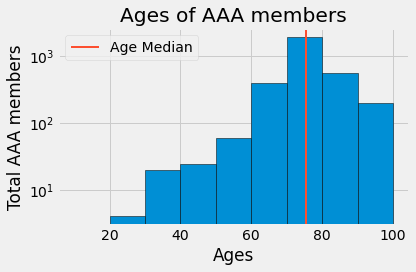

In [18]:
cklist = ['Individual_Key', 'Age']
data = df_rm[cklist].copy()
data.dropna()
data.drop_duplicates()

plt.style.use('fivethirtyeight')

ids = data['Individual_Key']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = ages.mean()
print("average age:", median_age)
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

plt.legend()

plt.title('Ages of AAA members')
plt.xlabel('Ages')
plt.ylabel('Total AAA members')

plt.tight_layout()

plt.show()


max tenure year: 87
min tenure year: 0
average tenure: 41.66356011183598


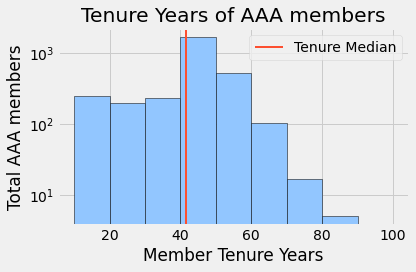

In [19]:
cklist = ['Individual_Key', 'Member_Tenure_Years']
data = df_rm[cklist].copy()
data.dropna()
data.drop_duplicates()

plt.style.use('seaborn-pastel')

ids = data['Individual_Key']
tenure = data['Member_Tenure_Years']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(tenure, bins=bins, edgecolor='black', log=True)

median_tenure = tenure.mean()
print("max tenure year:", tenure.max())
print("min tenure year:", tenure.min())
print("average tenure:", median_tenure)
color = '#fc4f30'

plt.axvline(median_tenure, color=color, label='Tenure Median', linewidth=2)

plt.legend()

plt.title('Tenure Years of AAA members')
plt.xlabel('Member Tenure Years')
plt.ylabel('Total AAA members')

plt.tight_layout()

plt.show()